# NoteBook 2 - Image Retrieval

---
<br>

### Name and ID:
Student 1: Sivan Zagdon 213002918
<br>
Student 2: Shir Zohar 323856542

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/20733/logos/header.png?t=2020-05-14-08-44-45">

In [ ]:
import os
!gdown 10E01fgPIiNbWoZdw5mfuGTFtviCXc5Xm -O explainer.md

print("File exists:", os.path.exists("explainer.md"))

Downloading...
From: https://drive.google.com/uc?id=10E01fgPIiNbWoZdw5mfuGTFtviCXc5Xm
To: /content/explainer.md
100% 884/884 [00:00<00:00, 1.92MB/s]
File exists: True


##**Winning model weights**

In [1]:
import os
!gdown 18pyU1ZAlWdGWZLZAEFBKlh1DGJm6VSZe -O weights.md

print("File exists:", os.path.exists("weights.md"))

Downloading...
From (original): https://drive.google.com/uc?id=18pyU1ZAlWdGWZLZAEFBKlh1DGJm6VSZe
From (redirected): https://drive.google.com/uc?id=18pyU1ZAlWdGWZLZAEFBKlh1DGJm6VSZe&confirm=t&uuid=240d2311-2136-4437-99b9-c51bc264c039
To: /content/weights.md
100% 257M/257M [00:07<00:00, 36.2MB/s]
File exists: True


# Utils

**Import Libraries**

In [ ]:

import os
import shutil
import kagglehub
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

import tensorflow as tf



!pip install ipython-autotime --quiet
!pip install gdown --upgrade --quiet
%load_ext autotime



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.6 MB/s eta 0:00:00
time: 510 µs (started: 2025-03-20 12:51:38 +00:00)


**Load and Preprocess Dataset**

In this code, we downloaded and extracted the Stanford Cars dataset and its metadata using gdown. We then loaded the dataset annotations and class names from an Excel file and a .mat file, respectively. Finally, we processed the data to extract image paths and labels, converting them into categorical format for training and testing a machine learning model.

In [ ]:

!pip install gdown --quiet

!gdown --id 1yr0Ac4ACIegWp3neDKy23xMJJ4mQx8Fu -O explainer_transer_learning.zip

!unzip -o explainer_transer_learning.zip

!ls -l explainer_transer_learning.md

DATASET_ID = "10f-OkhFIv1p5IOtY7NBM31n52Ndt7CjS"
DATASET_ZIP = "stanford_cars_with_class_names.zip"
DATASET_EXCEL = "stanford_cars_with_class_names.xlsx"

!gdown {DATASET_ID} -O {DATASET_ZIP}
!unzip -q {DATASET_ZIP} -d /content/dataset

!mkdir -p /content/dataset
path = kagglehub.dataset_download("jessicali9530/stanford-cars-dataset")
!mv /root/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2/* /content/dataset

metadata_path = "/content/dataset/" + DATASET_EXCEL
xls = pd.ExcelFile(metadata_path)

train_df = pd.read_excel(xls, sheet_name="train")
test_df = pd.read_excel(xls, sheet_name="test")

annotations_path = "/content/dataset/cars_annos.mat"
metadata = scipy.io.loadmat(annotations_path)
annotations = metadata["annotations"]
class_names = metadata["class_names"]
class_names_list = [name[0] for name in class_names[0]]

def extract_annotations(df):
    annotations = []
    class_names = np.empty(196, dtype=object)
    for _, row in df.iterrows():
        image_path = row["image"]
        class_num = int(row["class"]) - 1
        class_name = row["ture_class_name"]
        class_names[class_num] = class_name
        annotations.append((image_path, class_num))
    return annotations, class_names

train_annotations, train_class_names = extract_annotations(train_df)
test_annotations, test_class_names = extract_annotations(test_df)

def get_image_paths_and_labels(df, dataset_type="cars_train"):
    image_paths = []
    labels = []

    for _, row in df.iterrows():
        image_name = row["image"]
        class_num = int(row["class"]) - 1
        clean_image_name = image_name.replace('"', '').replace("'", "")
        image_paths.append(f"/content/dataset/{dataset_type}/{clean_image_name}")
        labels.append(class_num)

    return image_paths, labels

train_image_paths, train_labels = get_image_paths_and_labels(train_df, "cars_train")
test_image_paths, test_labels = get_image_paths_and_labels(test_df, "cars_test")

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=196)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=196)

print("Dataset Successfully Loaded!")
print(f"Number of training images: {len(train_image_paths)}")
print(f"Number of test images: {len(test_image_paths)}")
print(f"Example training image path: {train_image_paths[0]}")
print(f"Sample class names: {train_class_names[:10]}")


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yr0Ac4ACIegWp3neDKy23xMJJ4mQx8Fu
To: /content/explainer_transer_learning.zip
100% 1.87k/1.87k [00:00<00:00, 2.19MB/s]
Archive:  explainer_transer_learning.zip
  inflating: explainer_transer_learning.md  
-rw-r--r-- 1 root root 4404 Feb 25 08:04 explainer_transer_learning.md
Downloading...
From: https://drive.google.com/uc?id=10f-OkhFIv1p5IOtY7NBM31n52Ndt7CjS
To: /content/stanford_cars_with_class_names.zip
100% 766k/766k [00:00<00:00, 8.86MB/s]


100%|██████████| 1.82G/1.82G [00:17<00:00, 110MB/s]

Extracting files...


Dataset Successfully Loaded!
Number of training images: 8144
Number of test images: 8041
Example training image path: /content/dataset/cars_train/00001.jpg
Sample class names: ['AM General Hummer SUV 2000' 'Acura RL Sedan 2012' 'Acura TL Sedan 2012'
 'Acura TL Type-S 2008' 'Acura TSX Sedan 2012' 'Acura Integra Type R 2001'
 'Acura ZDX Hatchback 2012' 'Aston Martin V8 Vantage Convertible 2012'
 'Aston Martin V8 Vantage Coupe 2012'
 'Aston Martin Virage Convertible 2012']
time: 1min 5s (started: 2025-03-20 12:51:43 +00:00)


**Display Random Images with Annotations**


In this code, we randomly select 5 images from the training annotations and display them with their bounding boxes. We use OpenCV to load the images and draw rectangles around the objects using the coordinates from the dataset. Finally, the images are displayed with their class names as titles using Matplotlib.

---



🔹 Image: 03713.jpg | Class: MINI Cooper Roadster Convertible 2012
   Bounding Box → x1: 143, y1: 127, x2: 461, y2: 316
🔹 Image: 07614.jpg | Class: Chevrolet Sonic Sedan 2012
   Bounding Box → x1: 34, y1: 293, x2: 996, y2: 679
🔹 Image: 02625.jpg | Class: Audi R8 Coupe 2012
   Bounding Box → x1: 53, y1: 102, x2: 398, y2: 234
🔹 Image: 03615.jpg | Class: Chevrolet Corvette ZR1 2012
   Bounding Box → x1: 29, y1: 35, x2: 478, y2: 287
🔹 Image: 03204.jpg | Class: Mercedes-Benz Sprinter Van 2012
   Bounding Box → x1: 55, y1: 109, x2: 957, y2: 702


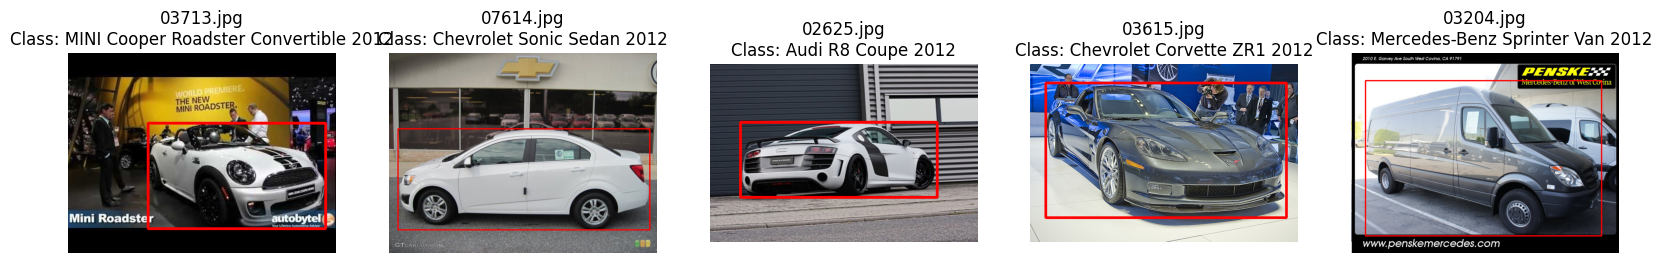

time: 602 ms (started: 2025-03-20 12:52:52 +00:00)


In [ ]:

import cv2
import random

random_samples = random.sample(train_annotations, 5)

def display_images_with_annotations(samples, dataset_path, df):
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))

    if len(samples) < 5:
        print("Not enough images to display.")
        return

    for idx, sample in enumerate(samples):
        if len(sample) < 2:
            print(f"Skipping invalid sample: {sample}")
            continue

        image_name, class_num = sample
        image_path = os.path.join(dataset_path, "cars_train/cars_train", image_name)

        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            continue

        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        row = df[df['image'] == image_name]
        if not row.empty:
            x1, y1, x2, y2 = int(row.iloc[0]['x1']), int(row.iloc[0]['y1']), int(row.iloc[0]['x2']), int(row.iloc[0]['y2'])
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 3)

            print(f"🔹 Image: {image_name} | Class: {train_class_names[class_num]}")
            print(f"   Bounding Box → x1: {x1}, y1: {y1}, x2: {x2}, y2: {y2}")

        title_text = f"{image_name}\nClass: {train_class_names[class_num]}"
        axes[idx].imshow(image)
        axes[idx].set_title(title_text)
        axes[idx].axis("off")

    plt.show()

dataset_path = "/content/dataset"
display_images_with_annotations(random_samples, dataset_path, train_df)


The code randomly displays 5 images from the test set along with their class names. If an image cannot be loaded, an error message is shown; otherwise, the image is displayed with the appropriate label.

Image: 04643.jpg | Class #124 → HUMMER H3T Crew Cab 2010
Image: 07537.jpg | Class #110 → Ford Edge SUV 2012
Image: 07824.jpg | Class #89 → Dodge Journey SUV 2012
Image: 06602.jpg | Class #79 → Chrysler 300 SRT-8 2010
Image: 07409.jpg | Class #34 → BMW M3 Coupe 2012


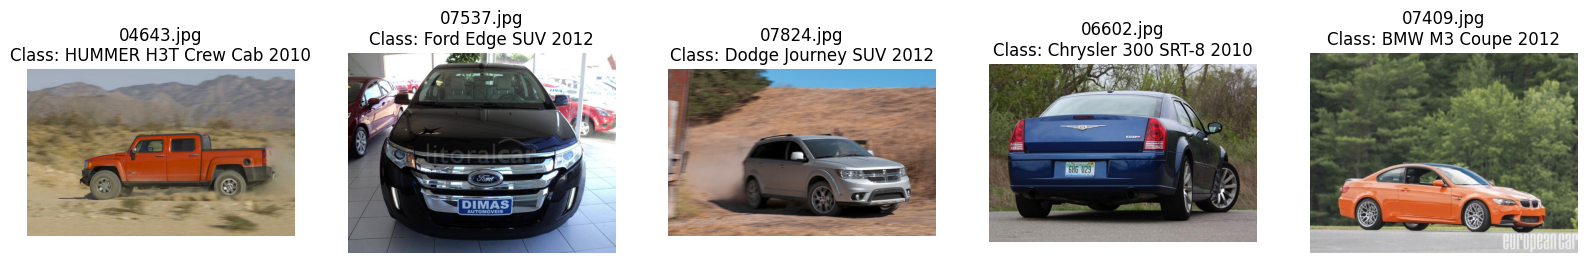

time: 4.1 s (started: 2025-03-20 12:53:01 +00:00)


In [ ]:

metadata_path = "/content/dataset/stanford_cars_with_class_names.xlsx"
xls = pd.ExcelFile(metadata_path)
test_df = pd.read_excel(xls, sheet_name="test")

test_df["image"] = test_df["image"].astype(str).str.replace("'", "")

TEST_IMAGE_PATH = "/content/dataset/cars_test/cars_test/"

def display_random_test_images(df, dataset_path, num_samples=5):
    """
    Displays random test images along with their class names.
    """
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))

    samples = df.sample(n=num_samples, random_state=random.randint(0, 10000))

    for idx, (_, row) in enumerate(samples.iterrows()):
        image_name = row["image"]
        image_path = os.path.join(dataset_path, image_name)

        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            continue

        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        class_name = row["ture_class_name"]
        class_num = int(row["class"])

        print(f"Image: {image_name} | Class #{class_num} → {class_name}")

        title_text = f"{image_name}\nClass: {class_name}"
        axes[idx].imshow(image)
        axes[idx].set_title(title_text)
        axes[idx].axis("off")

    plt.show()

display_random_test_images(test_df, TEST_IMAGE_PATH, num_samples=5)


## **Experiment 1 - Train, Validation and Test (MobileNetV2)**

The experiment implements an **image retrieval system** using **MobileNetV2** as an embedding extractor and **KNN** for nearest neighbor search. The dataset is split into **train, validation, and test sets**, with **3000 samples** used for training. Images undergo preprocessing, and embeddings are extracted from MobileNetV2 for each dataset. A **KNN model (k=5, Euclidean distance)** is trained on the train embeddings, and retrieval performance is evaluated using **Precision@5** and **mean distance to neighbors**. The results provide insights into retrieval accuracy across datasets, helping assess the model’s ability to generalize.

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import os
import pickle
from sklearn.model_selection import train_test_split

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


base_model = models.mobilenet_v2(weights='MobileNet_V2_Weights.DEFAULT')
embedding_model = nn.Sequential(*list(base_model.children())[:-1])
embedding_model.eval().to(device)
print("MobileNetV2 Embedding Model Prepared!")


data_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


sample_size = 3000
train_image_paths, train_labels = get_image_paths_and_labels(train_df, "cars_train/cars_train")
test_image_paths, test_labels = get_image_paths_and_labels(test_df, "cars_test/cars_test")


train_image_paths, val_image_paths, train_labels, val_labels = train_test_split(
    train_image_paths[:sample_size], train_labels[:sample_size], test_size=0.2, random_state=42
)


train_dataset = CustomDataset(train_image_paths, train_labels, transform=data_transforms)
val_dataset = CustomDataset(val_image_paths, val_labels, transform=data_transforms)
test_dataset = CustomDataset(test_image_paths[:sample_size], test_labels[:sample_size], transform=data_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)


def extract_embeddings(model, dataloader, device):
    model.eval()
    embeddings, labels = [], []
    with torch.no_grad():
        for images, lbls in dataloader:
            images = images.to(device)
            outputs = model(images).view(images.size(0), -1)
            embeddings.extend(outputs.cpu().numpy())
            labels.extend(lbls.numpy())
    return np.array(embeddings), np.array(labels)


train_embeddings, train_labels = extract_embeddings(embedding_model, train_loader, device)
val_embeddings, val_labels = extract_embeddings(embedding_model, val_loader, device)
test_embeddings, test_labels = extract_embeddings(embedding_model, test_loader, device)

print(f"Train Embeddings Shape: {train_embeddings.shape}")
print(f"Validation Embeddings Shape: {val_embeddings.shape}")
print(f"Test Embeddings Shape: {test_embeddings.shape}")


knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(train_embeddings)
print("KNN Model Trained on Train Embeddings!")


def evaluate_model(image_paths, labels, model, knn, train_image_paths, train_labels, transform, device):
    precision_values, distance_values = [], []
    retrieved_labels = []

    for img_path, label in zip(image_paths, labels):
        image = transform(Image.open(img_path).convert('RGB')).unsqueeze(0).to(device)
        with torch.no_grad():
            embedding = model(image).view(1, -1).cpu().numpy()
        distances, indices = knn.kneighbors(embedding)
        predicted_labels = [train_labels[idx] for idx in indices[0]]


        precision = sum([1 for lbl in predicted_labels if lbl == label]) / len(predicted_labels)
        precision_values.append(precision)
        distance_values.append(np.mean(distances))


        most_common_label = max(set(predicted_labels), key=predicted_labels.count)
        retrieved_labels.append(most_common_label)

    return np.array(precision_values), np.array(distance_values), np.array(retrieved_labels)


precision_values_train, distance_values_train, _ = evaluate_model(
    train_image_paths, train_labels, embedding_model, knn, train_image_paths, train_labels, data_transforms, device
)

precision_values_val, distance_values_val, _ = evaluate_model(
    val_image_paths, val_labels, embedding_model, knn, train_image_paths, train_labels, data_transforms, device
)

precision_values_test, distance_values_test, retrieved_labels = evaluate_model(
    test_image_paths[:sample_size], test_labels[:sample_size], embedding_model, knn, train_image_paths, train_labels, data_transforms, device
)


if len(retrieved_labels) > len(test_labels):
    retrieved_labels = retrieved_labels[:len(test_labels)]


mean_precision_train = precision_values_train.mean()
mean_precision_val = precision_values_val.mean()
mean_precision_test = precision_values_test.mean()

mean_distance_train = distance_values_train.mean()
mean_distance_val = distance_values_val.mean()
mean_distance_test = distance_values_test.mean()

print(f"Train - Precision@5: {mean_precision_train:.4f}")
print(f"Validation - Precision@5: {mean_precision_val:.4f}")
print(f"Test - Precision@5: {mean_precision_test:.4f}")
print(f"--------------------------------------------")

print(f"Train - Mean Distance: {mean_distance_train:.4f}")
print(f"Validation - Mean Distance: {mean_distance_val:.4f}")
print(f"Test - Mean Distance: {mean_distance_test:.4f}")
print(f"--------------------------------------------")

print(f"retrieved_labels shape: {retrieved_labels.shape}, test_labels shape: {test_labels.shape}")


Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth


Using device: cuda


100%|██████████| 13.6M/13.6M [00:00<00:00, 67.4MB/s]


MobileNetV2 Embedding Model Prepared!


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Train Embeddings Shape: (2400, 20480)
Validation Embeddings Shape: (600, 20480)
Test Embeddings Shape: (3000, 20480)
KNN Model Trained on Train Embeddings!
Train - Precision@5: 0.0051
Validation - Precision@5: 0.0453
Test - Precision@5: 0.0483
--------------------------------------------
Train - Mean Distance: 88.1026
Validation - Mean Distance: 111.0373
Test - Mean Distance: 110.2190
--------------------------------------------
retrieved_labels shape: (3000,), test_labels shape: (3000,)
time: 20min 23s (started: 2025-03-20 12:53:14 +00:00)


## **Experiment 1 - Performance Analysis:**
The code generates multiple visualizations to evaluate the performance of an image retrieval model. The **confusion matrix** compares true vs. predicted labels to assess classification accuracy. A **bar chart** presents precision, recall, and F1-score for detected classes. **Density plots** show the distribution of Precision@5 and mean distances to nearest neighbors across train, validation, and test sets, helping to analyze consistency. Additionally, **bar charts** compare the average Precision@5 and mean distance across different datasets, providing insight into retrieval quality and generalization performance.
""

retrieved_labels shape: (3000,), test_labels shape: (3000,)


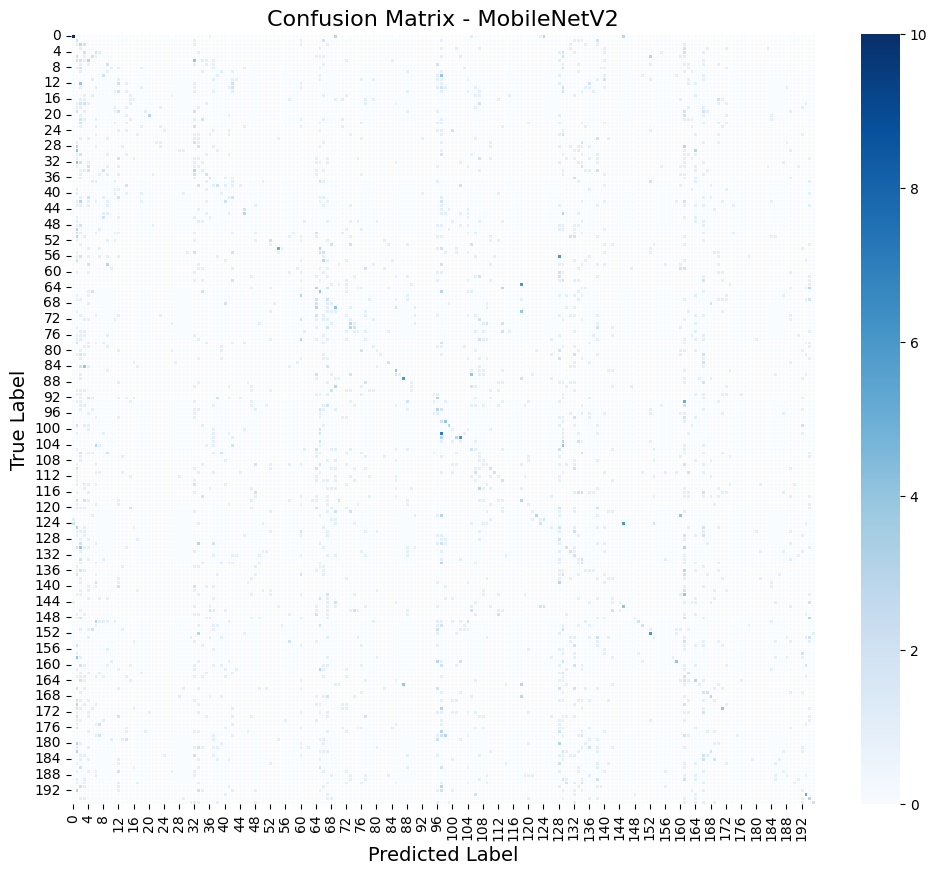

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


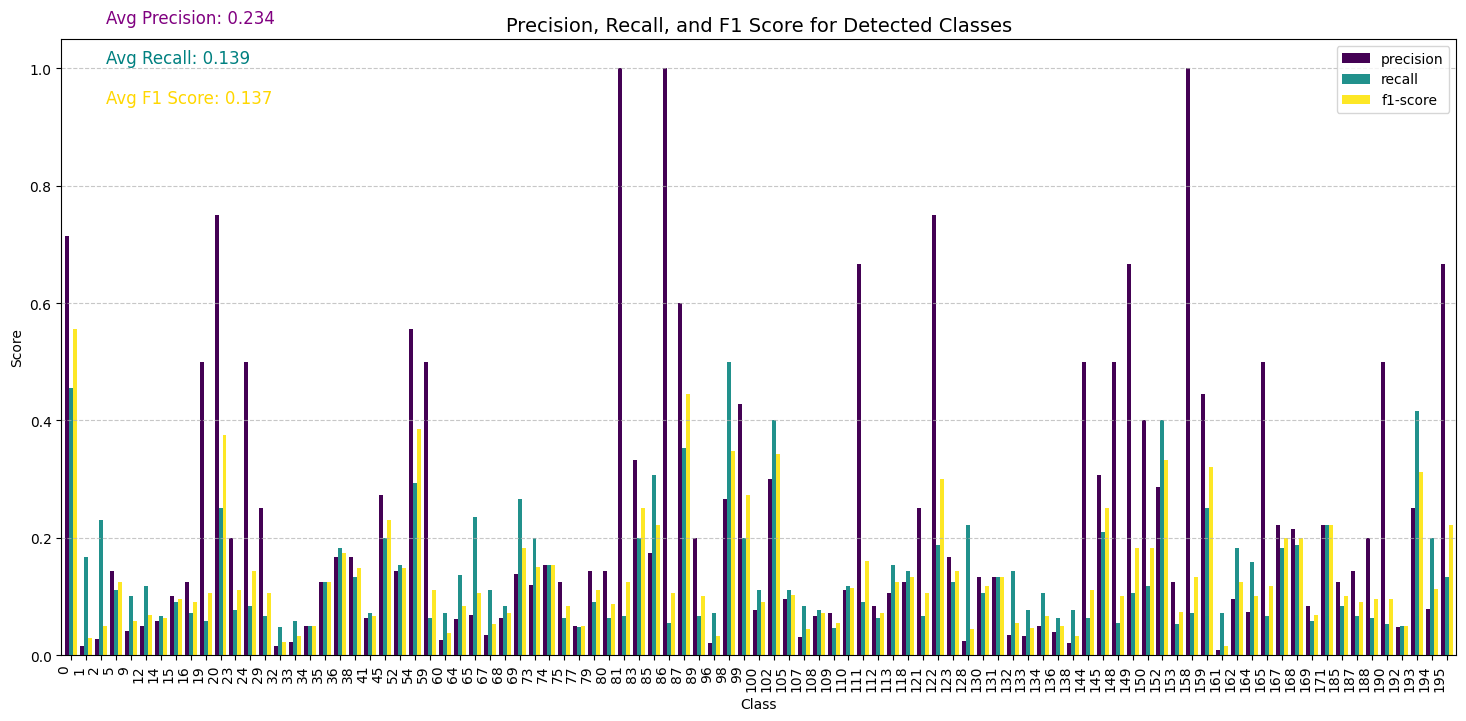

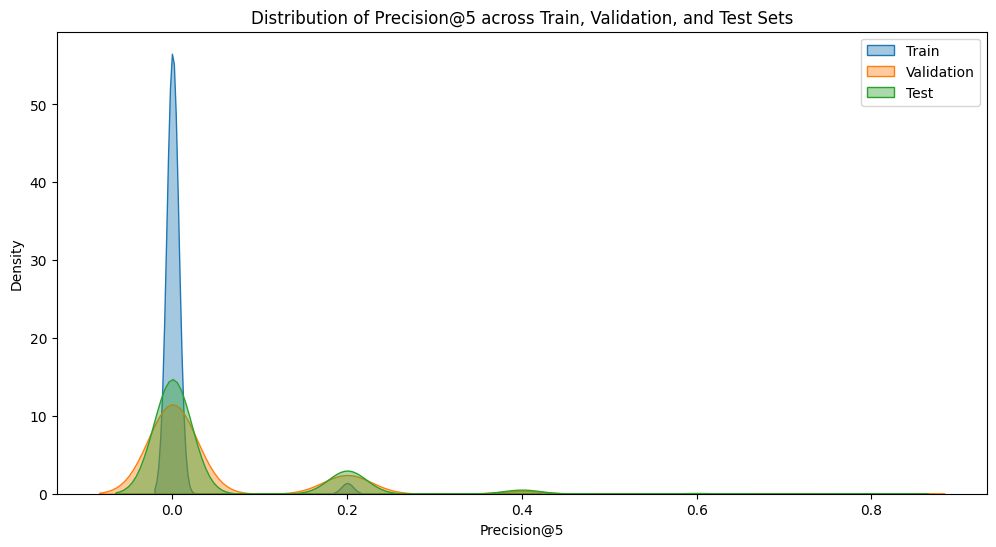

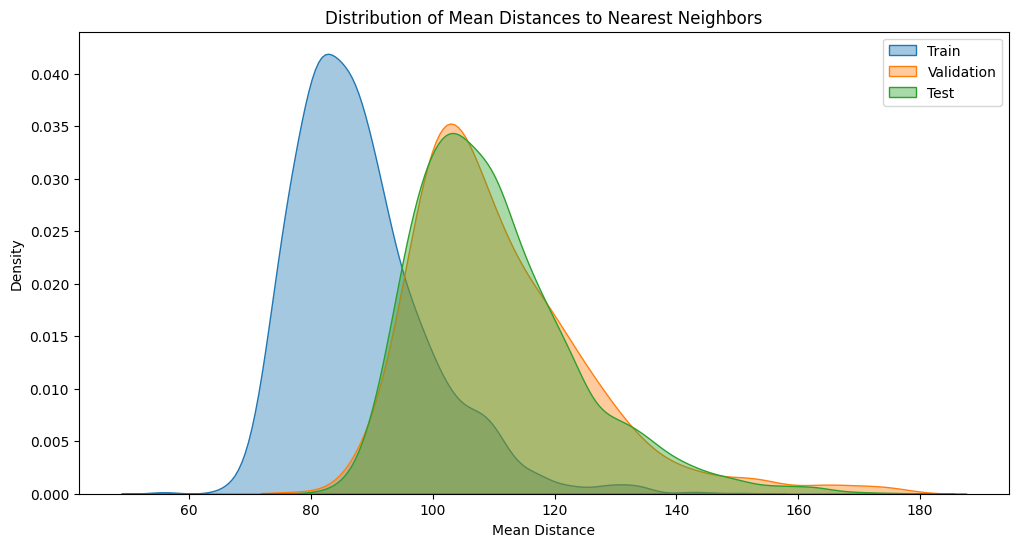

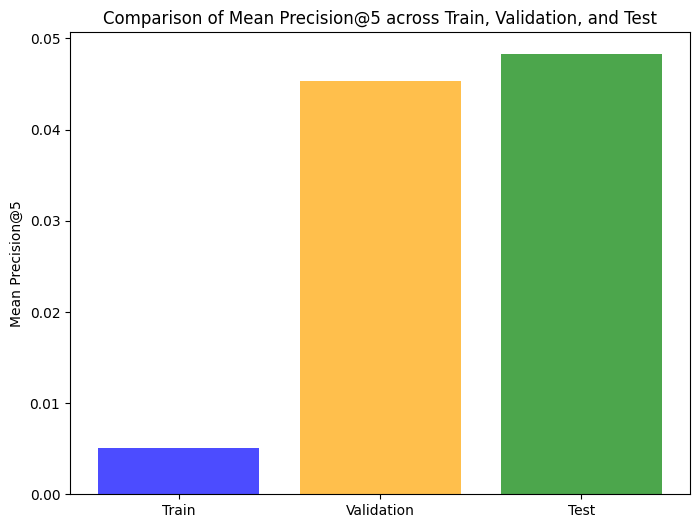

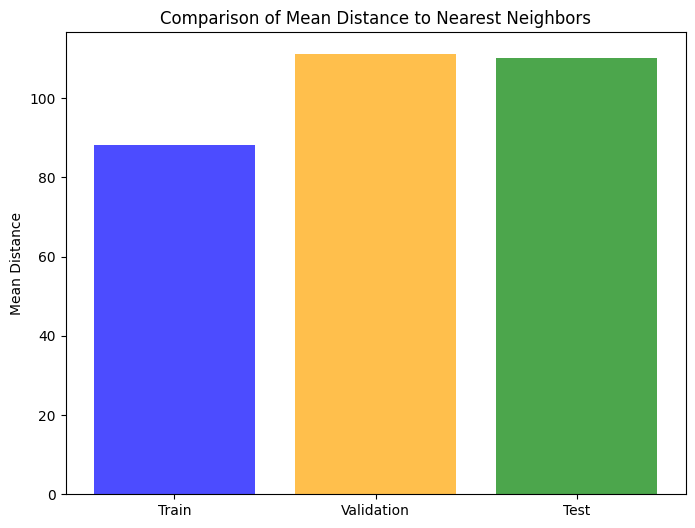

time: 2.9 s (started: 2025-03-20 13:14:16 +00:00)


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
import torch

retrieved_labels = np.array(retrieved_labels)

if len(retrieved_labels) > len(test_labels):
    retrieved_labels = retrieved_labels[:len(test_labels)]
elif len(retrieved_labels) < len(test_labels):
    test_labels = test_labels[:len(retrieved_labels)]

print(f"retrieved_labels shape: {retrieved_labels.shape}, test_labels shape: {test_labels.shape}")

conf_matrix = confusion_matrix(test_labels, retrieved_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=False, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix - MobileNetV2", fontsize=16)
plt.show()

report = classification_report(test_labels, retrieved_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.iloc[:-3, :3]
df_report_filtered = df_report[(df_report['precision'] > 0) | (df_report['recall'] > 0)]

fig, ax = plt.subplots(figsize=(18, 8))
df_report_filtered.plot(kind="bar", ax=ax, width=0.8, colormap="viridis")

plt.xticks(rotation=90, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Precision, Recall, and F1 Score for Detected Classes", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Class")
plt.legend(loc="upper right")

avg_precision = df_report_filtered['precision'].mean()
avg_recall = df_report_filtered['recall'].mean()
avg_f1 = df_report_filtered['f1-score'].mean()

plt.figtext(0.15, 0.9, f"Avg Precision: {avg_precision:.3f}", fontsize=12, color="purple")
plt.figtext(0.15, 0.85, f"Avg Recall: {avg_recall:.3f}", fontsize=12, color="teal")
plt.figtext(0.15, 0.80, f"Avg F1 Score: {avg_f1:.3f}", fontsize=12, color="gold")

plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(precision_values_train, label="Train", fill=True, alpha=0.4)
sns.kdeplot(precision_values_val, label="Validation", fill=True, alpha=0.4)
sns.kdeplot(precision_values_test, label="Test", fill=True, alpha=0.4)
plt.title("Distribution of Precision@5 across Train, Validation, and Test Sets")
plt.xlabel("Precision@5")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(distance_values_train, label="Train", fill=True, alpha=0.4)
sns.kdeplot(distance_values_val, label="Validation", fill=True, alpha=0.4)
sns.kdeplot(distance_values_test, label="Test", fill=True, alpha=0.4)
plt.title("Distribution of Mean Distances to Nearest Neighbors")
plt.xlabel("Mean Distance")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(["Train", "Validation", "Test"],
        [mean_precision_train, mean_precision_val, mean_precision_test],
        color=["blue", "orange", "green"], alpha=0.7)
plt.ylabel("Mean Precision@5")
plt.title("Comparison of Mean Precision@5 across Train, Validation, and Test")
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(["Train", "Validation", "Test"],
        [mean_distance_train, mean_distance_val, mean_distance_test],
        color=["blue", "orange", "green"], alpha=0.7)
plt.ylabel("Mean Distance")
plt.title("Comparison of Mean Distance to Nearest Neighbors")
plt.show()


## **Experiment 2 - Train, Validation and Test (ResNet50)**

The experiment consists of an **image retrieval pipeline** using **ResNet50** as an embedding extractor and **KNN** for nearest neighbor search. The dataset is split into **train, validation, and test sets**, with **3000 samples** used for training. Images are processed with **resizing, normalization, and tensor conversion** before passing through the model. Embeddings are extracted for each dataset, and a **KNN model (k=5, Euclidean distance)** is trained on the train embeddings. The evaluation includes computing **Precision@5, mean distances**, and classification metrics (**precision, recall, and F1-score**) to analyze retrieval accuracy across datasets.


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


base_model_2 = models.resnet50(weights='ResNet50_Weights.DEFAULT')
embedding_model_2 = nn.Sequential(*list(base_model_2.children())[:-1])
embedding_model_2.eval().to(device)
print("ResNet50 Embedding Model Prepared for Experiment 2!")


data_transforms_2 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


sample_size_2 = 3000
train_image_paths_2, train_labels_2 = get_image_paths_and_labels(train_df, "cars_train/cars_train")
test_image_paths_2, test_labels_2 = get_image_paths_and_labels(test_df, "cars_test/cars_test")


train_image_paths_2, val_image_paths_2, train_labels_2, val_labels_2 = train_test_split(
    train_image_paths_2[:sample_size_2], train_labels_2[:sample_size_2], test_size=0.2, random_state=42
)


train_dataset_2 = CustomDataset(train_image_paths_2, train_labels_2, transform=data_transforms_2)
val_dataset_2 = CustomDataset(val_image_paths_2, val_labels_2, transform=data_transforms_2)
test_dataset_2 = CustomDataset(test_image_paths_2[:sample_size_2], test_labels_2[:sample_size_2], transform=data_transforms_2)

train_loader_2 = DataLoader(train_dataset_2, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_loader_2 = DataLoader(val_dataset_2, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
test_loader_2 = DataLoader(test_dataset_2, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)


def extract_embeddings_2(model, dataloader, device):
    model.eval()
    embeddings, labels = [], []
    with torch.no_grad():
        for images, lbls in dataloader:
            images = images.to(device)
            outputs = model(images).view(images.size(0), -1)
            embeddings.extend(outputs.cpu().numpy())
            labels.extend(lbls.numpy())
    return np.array(embeddings), np.array(labels)


train_embeddings_2, train_labels_2 = extract_embeddings_2(embedding_model_2, train_loader_2, device)
val_embeddings_2, val_labels_2 = extract_embeddings_2(embedding_model_2, val_loader_2, device)
test_embeddings_2, test_labels_2 = extract_embeddings_2(embedding_model_2, test_loader_2, device)

print(f"Train Embeddings Shape: {train_embeddings_2.shape}")
print(f"Validation Embeddings Shape: {val_embeddings_2.shape}")
print(f"Test Embeddings Shape: {test_embeddings_2.shape}")


knn_2 = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn_2.fit(train_embeddings_2)
print("KNN Model Trained on Train Embeddings for Experiment 2!")


def evaluate_model_2(image_paths, labels, model, knn, train_image_paths, train_labels, transform, device):
    precision_values, distance_values, retrieved_labels = [], [], []

    for img_path, label in zip(image_paths, labels):
        image = transform(Image.open(img_path).convert('RGB')).unsqueeze(0).to(device)
        with torch.no_grad():
            embedding = model(image).view(1, -1).cpu().numpy()
        distances, indices = knn.kneighbors(embedding)
        predicted_labels = [train_labels[idx] for idx in indices[0]]


        precision = sum([1 for lbl in predicted_labels if lbl == label]) / len(predicted_labels)
        precision_values.append(precision)
        distance_values.append(np.mean(distances))


        most_common_label = max(set(predicted_labels), key=predicted_labels.count)
        retrieved_labels.append(most_common_label)

    return np.array(precision_values), np.array(distance_values), np.array(retrieved_labels)


precision_values_train_2, distance_values_train_2, _ = evaluate_model_2(
    train_image_paths_2, train_labels_2, embedding_model_2, knn_2, train_image_paths_2, train_labels_2, data_transforms_2, device
)

precision_values_val_2, distance_values_val_2, _ = evaluate_model_2(
    val_image_paths_2, val_labels_2, embedding_model_2, knn_2, train_image_paths_2, train_labels_2, data_transforms_2, device
)

precision_values_test_2, distance_values_test_2, retrieved_labels_2 = evaluate_model_2(
    test_image_paths_2[:sample_size_2], test_labels_2[:sample_size_2], embedding_model_2, knn_2, train_image_paths_2, train_labels_2, data_transforms_2, device
)


report_2 = classification_report(test_labels_2, retrieved_labels_2, output_dict=True)
df_report_2 = pd.DataFrame(report_2).transpose()

avg_precision_2 = df_report_2['precision'].mean()
avg_recall_2 = df_report_2['recall'].mean()
avg_f1_2 = df_report_2['f1-score'].mean()


mean_precision_train_2 = precision_values_train_2.mean()
mean_precision_val_2 = precision_values_val_2.mean()
mean_precision_test_2 = precision_values_test_2.mean()

mean_distance_train_2 = distance_values_train_2.mean()
mean_distance_val_2 = distance_values_val_2.mean()
mean_distance_test_2 = distance_values_test_2.mean()

print(f"Avg Precision (Exp 2): {avg_precision_2:.4f}")
print(f"Avg Recall (Exp 2): {avg_recall_2:.4f}")
print(f"Avg F1 Score (Exp 2): {avg_f1_2:.4f}")


Using device: cuda


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 155MB/s]


ResNet50 Embedding Model Prepared for Experiment 2!


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Train Embeddings Shape: (2400, 2048)
Validation Embeddings Shape: (600, 2048)
Test Embeddings Shape: (3000, 2048)
KNN Model Trained on Train Embeddings for Experiment 2!
Avg Precision (Exp 2): 0.1848
Avg Recall (Exp 2): 0.1430
Avg F1 Score (Exp 2): 0.1387
time: 4min 5s (started: 2025-03-20 13:14:23 +00:00)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Experiment 2 - Performance Analysis:**
The code visualizes and analyzes the performance of an **image retrieval experiment using ResNet50** through multiple graphs. It first generates a **confusion matrix**, showing the distribution of true vs. predicted labels. A **bar chart** presents precision, recall, and F1-score for each class, highlighting classification performance. **Density plots** compare the distribution of **Precision@5** and **mean distances to nearest neighbors** across train, validation, and test sets, assessing consistency. Finally, **bar charts** compare the average **Precision@5** and **mean distance** across datasets, providing insights into retrieval effectiveness and generalization of the model.



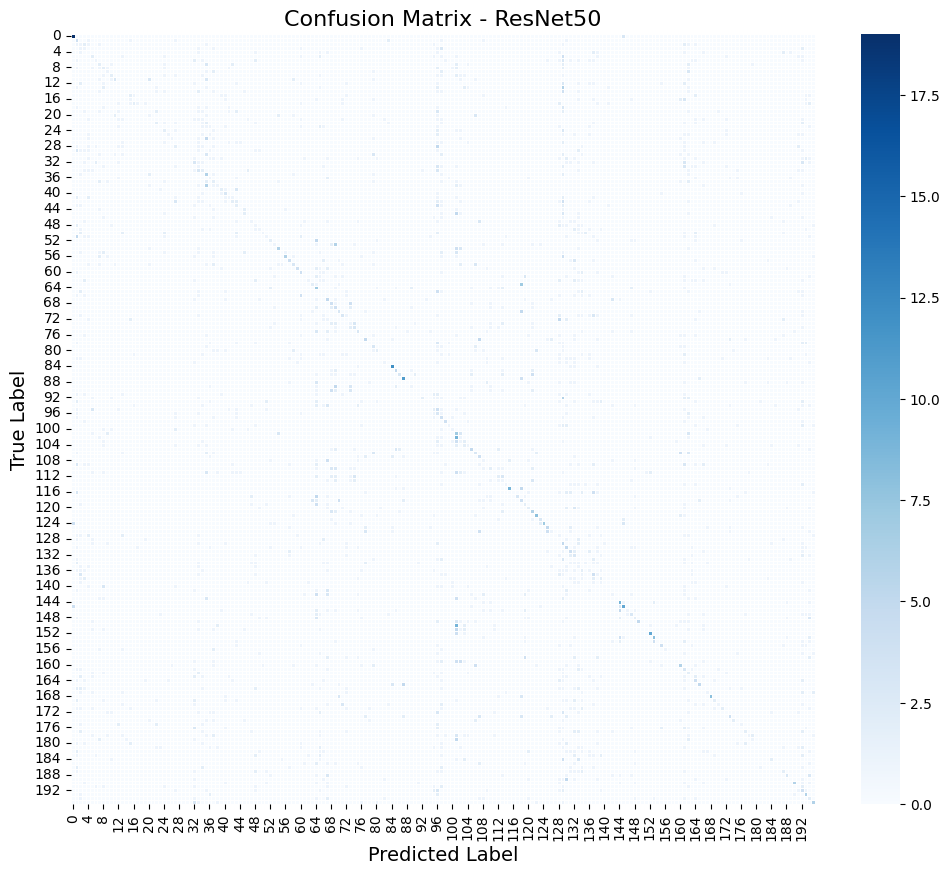

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


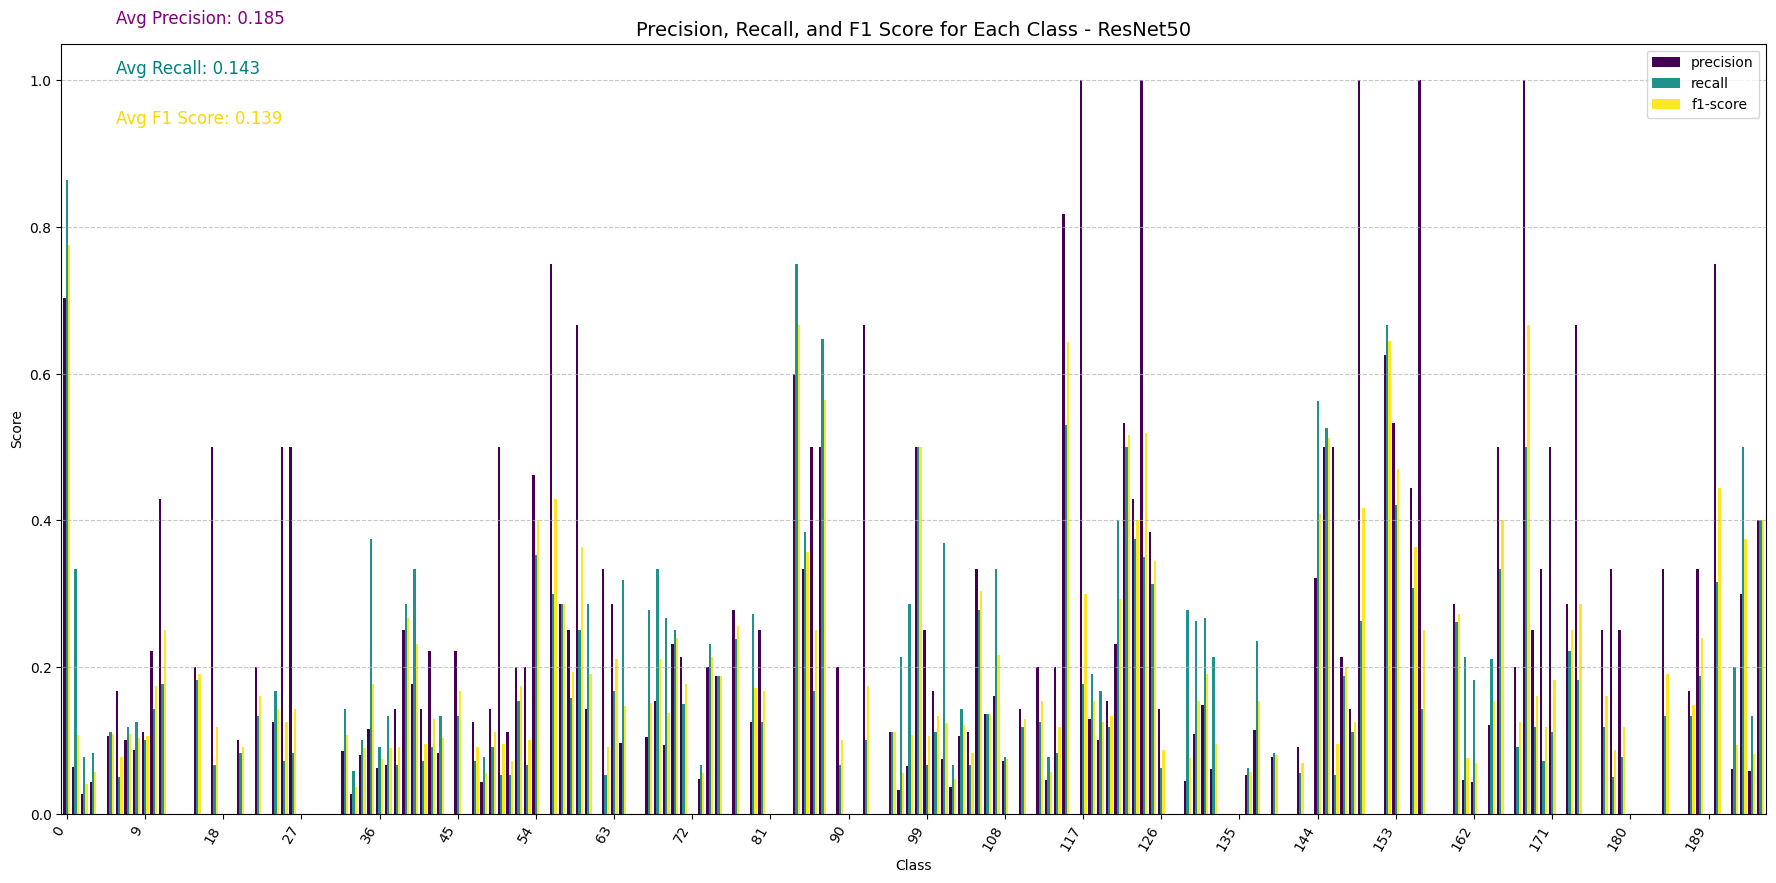

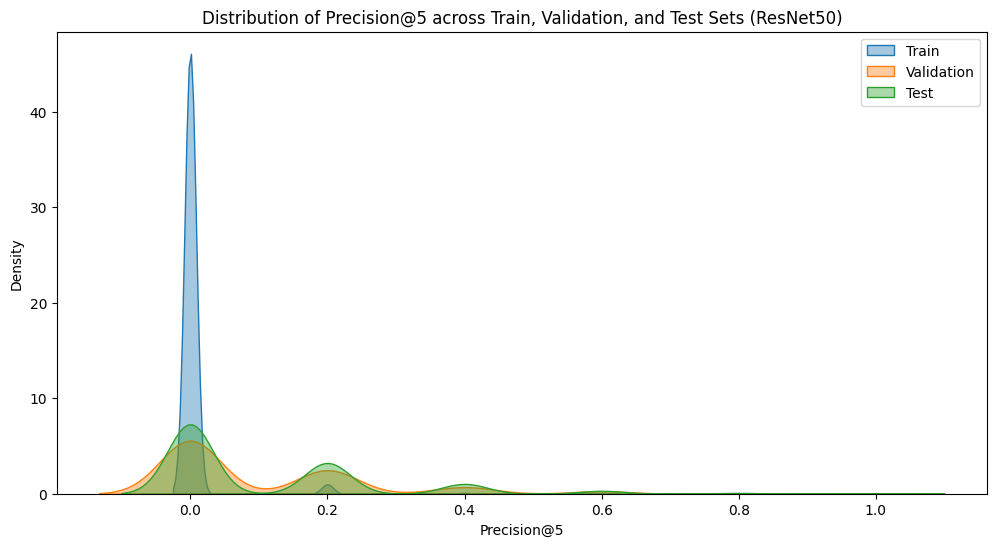

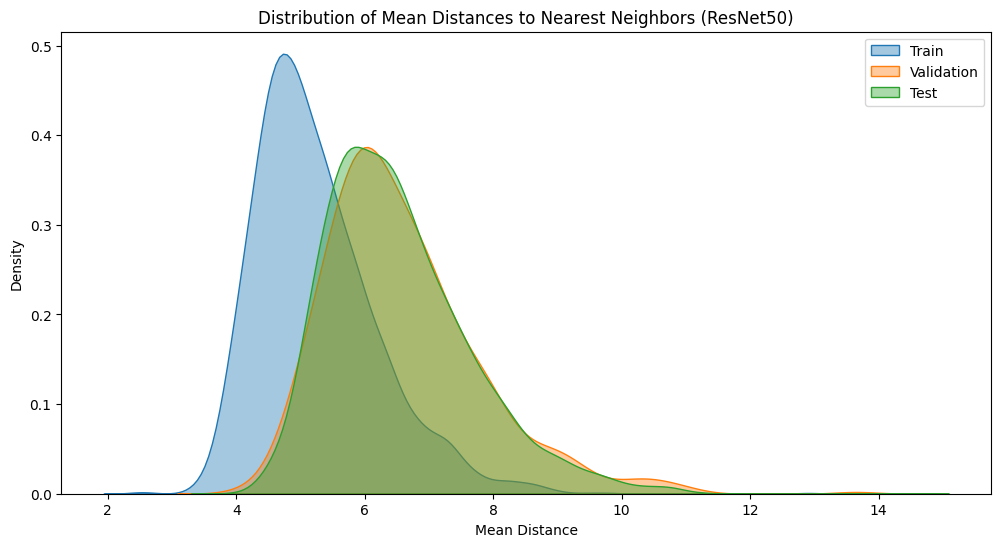

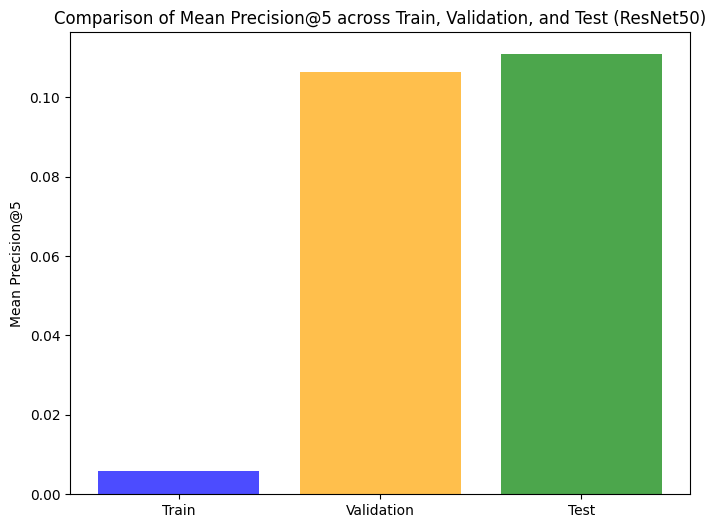

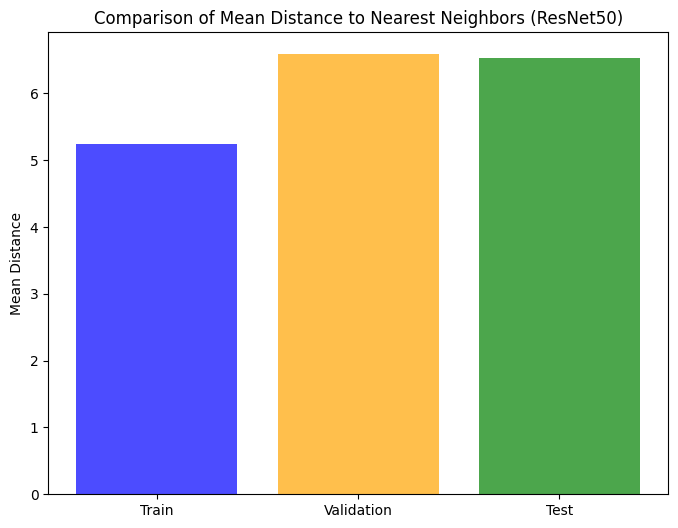

time: 3.14 s (started: 2025-03-20 13:19:01 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix_2 = confusion_matrix(test_labels_2, retrieved_labels_2)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_2, annot=False, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix - ResNet50", fontsize=16)
plt.show()

report_2 = classification_report(test_labels_2, retrieved_labels_2, output_dict=True)
df_report_2 = pd.DataFrame(report_2).transpose()
df_report_2 = df_report_2.iloc[:-3, :3]

fig, ax = plt.subplots(figsize=(22, 10))
df_report_2.plot(kind="bar", ax=ax, width=0.8, colormap="viridis")


num_classes = len(df_report_2)
step = max(1, num_classes // 20)
ax.set_xticks(range(0, num_classes, step))
ax.set_xticklabels(df_report_2.index[::step], rotation=60, ha="right", fontsize=10)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Precision, Recall, and F1 Score for Each Class - ResNet50", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Class")
plt.legend(loc="upper right")

avg_precision_2 = df_report_2['precision'].mean()
avg_recall_2 = df_report_2['recall'].mean()
avg_f1_2 = df_report_2['f1-score'].mean()

plt.figtext(0.15, 0.9, f"Avg Precision: {avg_precision_2:.3f}", fontsize=12, color="purple")
plt.figtext(0.15, 0.85, f"Avg Recall: {avg_recall_2:.3f}", fontsize=12, color="teal")
plt.figtext(0.15, 0.80, f"Avg F1 Score: {avg_f1_2:.3f}", fontsize=12, color="gold")

plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(precision_values_train_2, label="Train", fill=True, alpha=0.4)
sns.kdeplot(precision_values_val_2, label="Validation", fill=True, alpha=0.4)
sns.kdeplot(precision_values_test_2, label="Test", fill=True, alpha=0.4)
plt.title("Distribution of Precision@5 across Train, Validation, and Test Sets (ResNet50)")
plt.xlabel("Precision@5")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(distance_values_train_2, label="Train", fill=True, alpha=0.4)
sns.kdeplot(distance_values_val_2, label="Validation", fill=True, alpha=0.4)
sns.kdeplot(distance_values_test_2, label="Test", fill=True, alpha=0.4)
plt.title("Distribution of Mean Distances to Nearest Neighbors (ResNet50)")
plt.xlabel("Mean Distance")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(["Train", "Validation", "Test"],
        [mean_precision_train_2, mean_precision_val_2, mean_precision_test_2],
        color=["blue", "orange", "green"], alpha=0.7)
plt.ylabel("Mean Precision@5")
plt.title("Comparison of Mean Precision@5 across Train, Validation, and Test (ResNet50)")
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(["Train", "Validation", "Test"],
        [mean_distance_train_2, mean_distance_val_2, mean_distance_test_2],
        color=["blue", "orange", "green"], alpha=0.7)
plt.ylabel("Mean Distance")
plt.title("Comparison of Mean Distance to Nearest Neighbors (ResNet50)")
plt.show()


## **Experiment 3 - Train, Validation and Test (EfficientNet-B7)**

The experiment implements an **image retrieval system** using **EfficientNet-B7** as an embedding extractor and **KNN with cosine distance** for nearest neighbor search. The dataset is split into **train, validation, and test sets**, with **3000 samples** used for training. Images undergo **resizing, normalization, and tensor conversion**, and embeddings are extracted using EfficientNet-B7. The embeddings are then **standardized using StandardScaler and reduced to 512 dimensions using PCA** to improve retrieval efficiency. A **KNN model (k=10)** is trained on the train embeddings, and retrieval performance is evaluated using **Precision@5** and **mean distance to neighbors**. The results provide insights into retrieval effectiveness and the impact of dimensionality reduction.


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import random
from sklearn.model_selection import train_test_split

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


base_model_3 = models.efficientnet_b7(weights='EfficientNet_B7_Weights.DEFAULT')
embedding_model_3 = nn.Sequential(*list(base_model_3.children())[:-1])
embedding_model_3.eval().to(device)
print("EfficientNet-B7 Embedding Model Prepared for Experiment 3!")


data_transforms_3 = transforms.Compose([
    transforms.Resize((600, 600)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


sample_size_3 = 3000
train_image_paths_3, train_labels_3 = get_image_paths_and_labels(train_df, "cars_train/cars_train")
test_image_paths_3, test_labels_3 = get_image_paths_and_labels(test_df, "cars_test/cars_test")


train_image_paths_3, val_image_paths_3, train_labels_3, val_labels_3 = train_test_split(
    train_image_paths_3[:sample_size_3], train_labels_3[:sample_size_3], test_size=0.2, random_state=42
)


train_dataset_3 = CustomDataset(train_image_paths_3, train_labels_3, transform=data_transforms_3)
val_dataset_3 = CustomDataset(val_image_paths_3, val_labels_3, transform=data_transforms_3)
test_dataset_3 = CustomDataset(test_image_paths_3[:sample_size_3], test_labels_3[:sample_size_3], transform=data_transforms_3)

train_loader_3 = DataLoader(train_dataset_3, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_loader_3 = DataLoader(val_dataset_3, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
test_loader_3 = DataLoader(test_dataset_3, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)


def extract_embeddings_3(model, dataloader, device):
    model.eval()
    embeddings, labels = [], []
    with torch.no_grad():
        for images, lbls in dataloader:
            images = images.to(device)
            outputs = model(images).view(images.size(0), -1)
            embeddings.extend(outputs.cpu().numpy())
            labels.extend(lbls.numpy())
    return np.array(embeddings), np.array(labels)


train_embeddings_3, train_labels_3 = extract_embeddings_3(embedding_model_3, train_loader_3, device)
val_embeddings_3, val_labels_3 = extract_embeddings_3(embedding_model_3, val_loader_3, device)
test_embeddings_3, test_labels_3 = extract_embeddings_3(embedding_model_3, test_loader_3, device)

print(f"Train Embeddings Shape: {train_embeddings_3.shape}")
print(f"Validation Embeddings Shape: {val_embeddings_3.shape}")
print(f"Test Embeddings Shape: {test_embeddings_3.shape}")


scaler_3 = StandardScaler()
train_embeddings_3 = scaler_3.fit_transform(train_embeddings_3)
pca_3 = PCA(n_components=512, whiten=True)
train_embeddings_3 = pca_3.fit_transform(train_embeddings_3)


knn_3 = NearestNeighbors(n_neighbors=10, metric='cosine')
knn_3.fit(train_embeddings_3)
print("KNN Model Trained on Train Embeddings for Experiment 3!")


def evaluate_model_3(image_paths, labels, model, knn, train_image_paths, train_labels, transform, device):
    precision_values, distance_values, retrieved_labels = [], [], []

    for img_path, label in zip(image_paths, labels):
        image = transform(Image.open(img_path).convert('RGB')).unsqueeze(0).to(device)
        with torch.no_grad():
            embedding = model(image).view(1, -1).cpu().numpy()
            embedding = scaler_3.transform(embedding)
            embedding = pca_3.transform(embedding)
        distances, indices = knn.kneighbors(embedding)
        predicted_labels = [train_labels[idx] for idx in indices[0]]


        precision = sum([1 for lbl in predicted_labels if lbl == label]) / len(predicted_labels)
        precision_values.append(precision)
        distance_values.append(np.mean(distances))


        most_common_label = max(set(predicted_labels), key=predicted_labels.count)
        retrieved_labels.append(most_common_label)

    return np.array(precision_values), np.array(distance_values), np.array(retrieved_labels)


precision_values_train_3, distance_values_train_3, _ = evaluate_model_3(
    train_image_paths_3, train_labels_3, embedding_model_3, knn_3, train_image_paths_3, train_labels_3, data_transforms_3, device
)

precision_values_val_3, distance_values_val_3, _ = evaluate_model_3(
    val_image_paths_3, val_labels_3, embedding_model_3, knn_3, train_image_paths_3, train_labels_3, data_transforms_3, device
)

precision_values_test_3, distance_values_test_3, retrieved_labels_3 = evaluate_model_3(
    test_image_paths_3[:sample_size_3], test_labels_3[:sample_size_3], embedding_model_3, knn_3, train_image_paths_3, train_labels_3, data_transforms_3, device
)


mean_precision_train_3 = precision_values_train_3.mean()
mean_precision_val_3 = precision_values_val_3.mean()
mean_precision_test_3 = precision_values_test_3.mean()

mean_distance_train_3 = distance_values_train_3.mean()
mean_distance_val_3 = distance_values_val_3.mean()
mean_distance_test_3 = distance_values_test_3.mean()
print(f"----------------------------------------------------------")

print(f"Train - Precision@5 (Exp 3): {mean_precision_train_3:.4f}")
print(f"Validation - Precision@5 (Exp 3): {mean_precision_val_3:.4f}")
print(f"Test - Precision@5 (Exp 3): {mean_precision_test_3:.4f}")
print(f"----------------------------------------------------------")

print(f"Train - Mean Distance (Exp 3): {mean_distance_train_3:.4f}")
print(f"Validation - Mean Distance (Exp 3): {mean_distance_val_3:.4f}")
print(f"Test - Mean Distance (Exp 3): {mean_distance_test_3:.4f}")
print(f"----------------------------------------------------------")


Using device: cuda


Downloading: "https://download.pytorch.org/models/efficientnet_b7_lukemelas-c5b4e57e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b7_lukemelas-c5b4e57e.pth
100%|██████████| 255M/255M [00:05<00:00, 51.0MB/s]


EfficientNet-B7 Embedding Model Prepared for Experiment 3!


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Train Embeddings Shape: (2400, 2560)
Validation Embeddings Shape: (600, 2560)
Test Embeddings Shape: (3000, 2560)
KNN Model Trained on Train Embeddings for Experiment 3!
----------------------------------------------------------
Train - Precision@5 (Exp 3): 0.0057
Validation - Precision@5 (Exp 3): 0.1867
Test - Precision@5 (Exp 3): 0.1961
----------------------------------------------------------
Train - Mean Distance (Exp 3): 0.7245
Validation - Mean Distance (Exp 3): 0.7830
Test - Mean Distance (Exp 3): 0.7841
----------------------------------------------------------
time: 16min 20s (started: 2025-03-20 13:19:11 +00:00)



##**Saving the winning model**

In [ ]:
import torch

MODEL_COMPLETE_PATH_3 = "embedding_model_weights_conf2.pth"


torch.save(embedding_model_3.state_dict(), MODEL_COMPLETE_PATH_3)
print(f" Weights saved successfully at: {MODEL_COMPLETE_PATH_3}")

torch.save(embedding_model_3, "embedding_model_conf2.pth")
print("Model saved successfully as embedding_model_conf2.pth")




 Weights saved successfully at: embedding_model_weights_conf2.pth
Model saved successfully as embedding_model_conf2.pth
time: 1.71 s (started: 2025-03-20 13:53:12 +00:00)


## **Experiment 3 - Performance Analysis:**

The code visualizes and evaluates the performance of an **image retrieval experiment using EfficientNet-B7** through multiple graphs. A **confusion matrix** is generated to compare true vs. predicted labels, providing insight into classification accuracy. A **bar chart** displays precision, recall, and F1-score for each class, assessing the retrieval model’s effectiveness. **Density plots** analyze the distribution of **Precision@5** and **mean distances to nearest neighbors** across train, validation, and test sets, helping to evaluate consistency. Additionally, **bar charts** compare the **average Precision@5** and **mean distance** across datasets, offering a deeper understanding of the model’s retrieval quality and generalization performance.


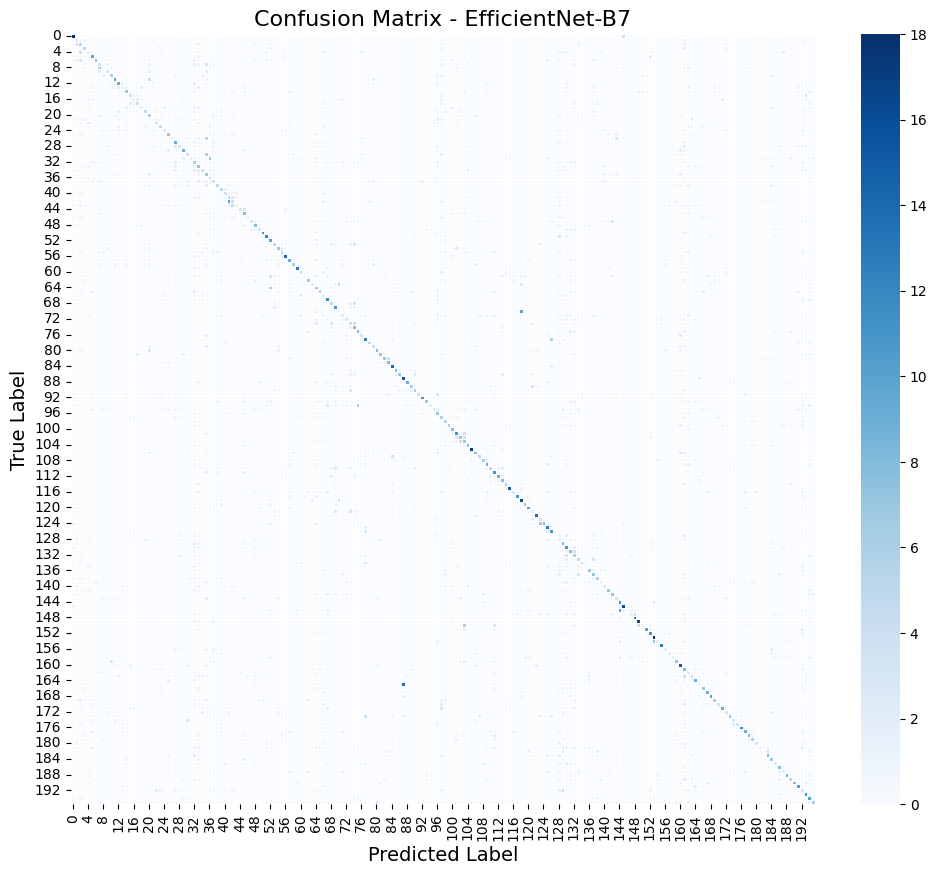

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


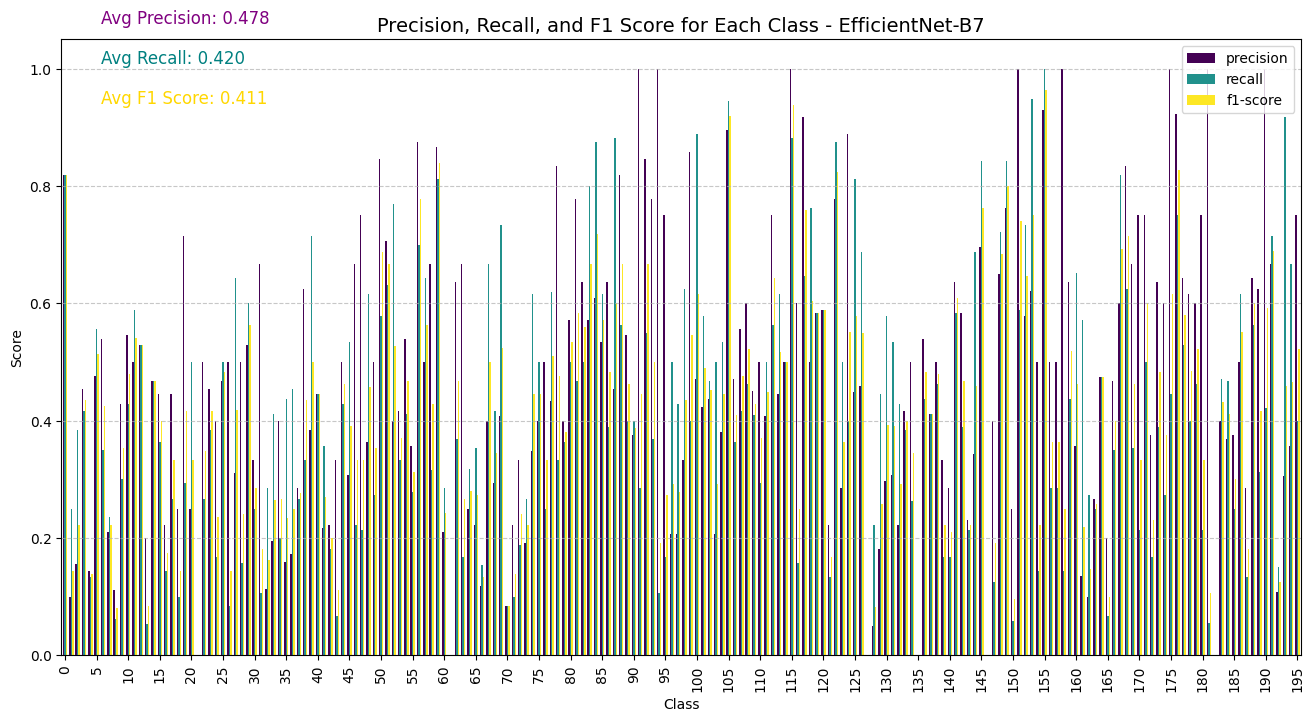

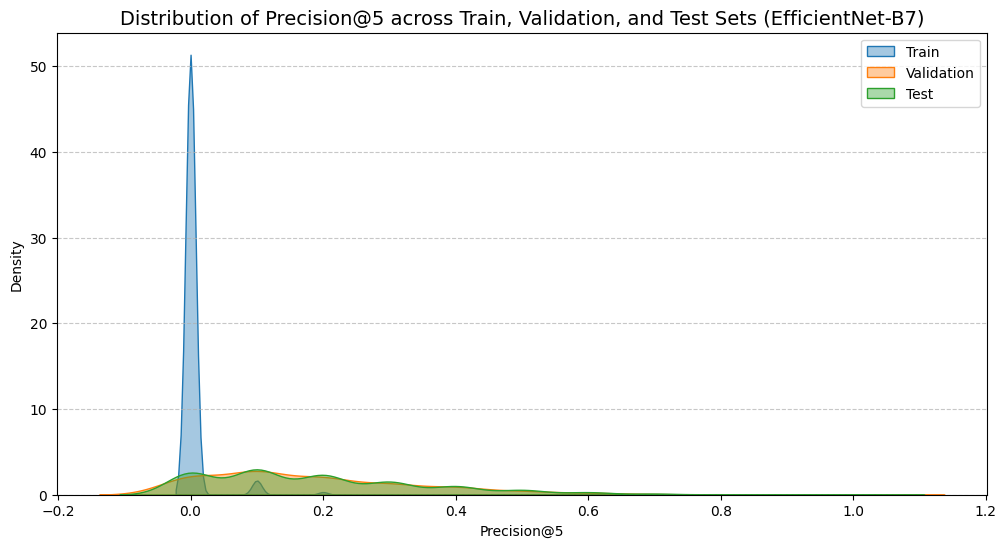

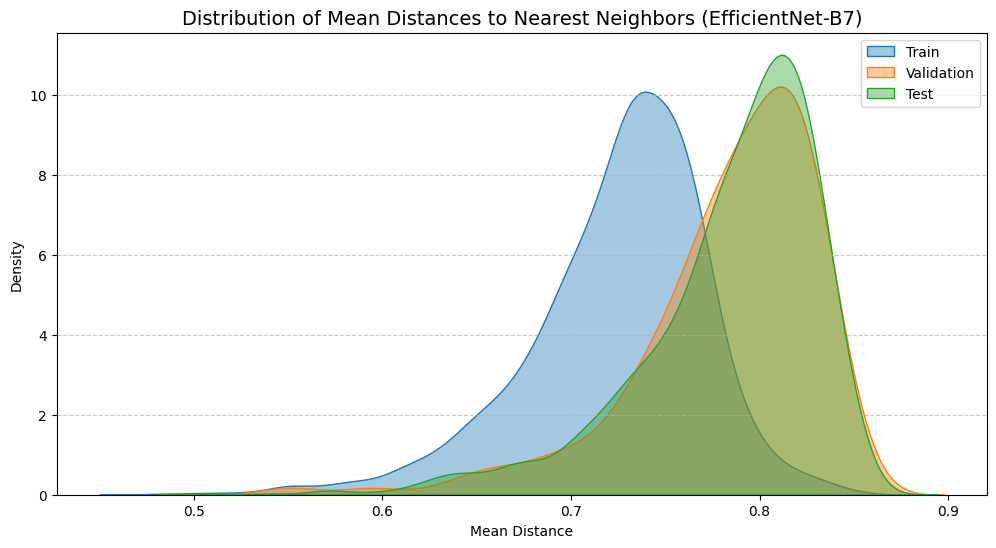

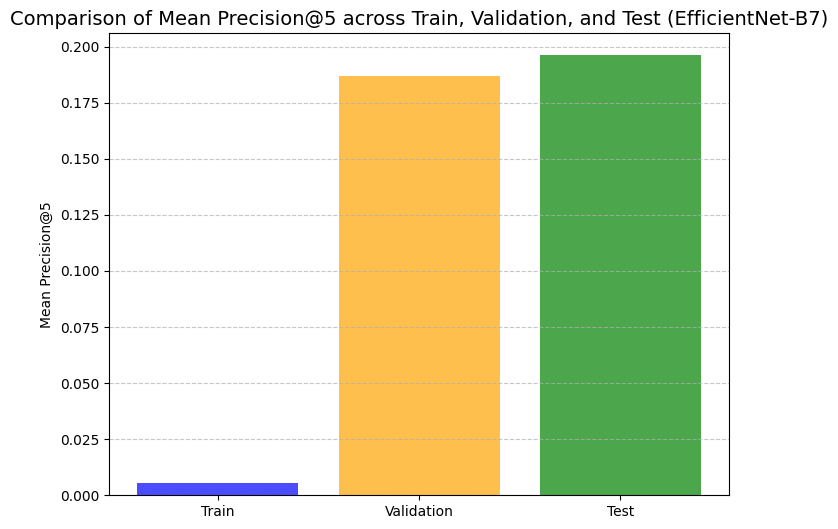

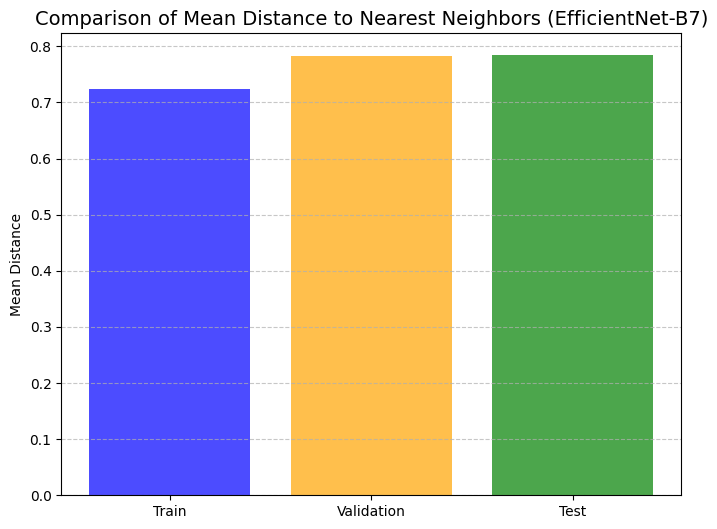

time: 2.73 s (started: 2025-03-20 13:36:15 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix


conf_matrix_3 = confusion_matrix(test_labels_3, retrieved_labels_3)


plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_3, annot=False, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix - EfficientNet-B7", fontsize=16)
plt.show()


report_3 = classification_report(test_labels_3, retrieved_labels_3, output_dict=True)
df_report_3 = pd.DataFrame(report_3).transpose()
df_report_3 = df_report_3.iloc[:-3, :3]


fig, ax = plt.subplots(figsize=(16, 8))
df_report_3.plot(kind="bar", ax=ax, width=0.7, colormap="viridis")


ax.set_xticks(ax.get_xticks()[::5])
ax.set_xticklabels(df_report_3.index[::5], rotation=90, fontsize=10)


plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Precision, Recall, and F1 Score for Each Class - EfficientNet-B7", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Class")
plt.legend(loc="upper right")


avg_precision_3 = df_report_3['precision'].mean()
avg_recall_3 = df_report_3['recall'].mean()
avg_f1_3 = df_report_3['f1-score'].mean()


plt.figtext(0.15, 0.9, f"Avg Precision: {avg_precision_3:.3f}", fontsize=12, color="purple")
plt.figtext(0.15, 0.85, f"Avg Recall: {avg_recall_3:.3f}", fontsize=12, color="teal")
plt.figtext(0.15, 0.80, f"Avg F1 Score: {avg_f1_3:.3f}", fontsize=12, color="gold")

plt.show()


plt.figure(figsize=(12, 6))
sns.kdeplot(precision_values_train_3, label="Train", fill=True, alpha=0.4)
sns.kdeplot(precision_values_val_3, label="Validation", fill=True, alpha=0.4)
sns.kdeplot(precision_values_test_3, label="Test", fill=True, alpha=0.4)
plt.title("Distribution of Precision@5 across Train, Validation, and Test Sets (EfficientNet-B7)", fontsize=14)
plt.xlabel("Precision@5")
plt.ylabel("Density")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


plt.figure(figsize=(12, 6))
sns.kdeplot(distance_values_train_3, label="Train", fill=True, alpha=0.4)
sns.kdeplot(distance_values_val_3, label="Validation", fill=True, alpha=0.4)
sns.kdeplot(distance_values_test_3, label="Test", fill=True, alpha=0.4)
plt.title("Distribution of Mean Distances to Nearest Neighbors (EfficientNet-B7)", fontsize=14)
plt.xlabel("Mean Distance")
plt.ylabel("Density")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


plt.figure(figsize=(8, 6))
plt.bar(["Train", "Validation", "Test"],
        [mean_precision_train_3, mean_precision_val_3, mean_precision_test_3],
        color=["blue", "orange", "green"], alpha=0.7)
plt.ylabel("Mean Precision@5")
plt.title("Comparison of Mean Precision@5 across Train, Validation, and Test (EfficientNet-B7)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


plt.figure(figsize=(8, 6))
plt.bar(["Train", "Validation", "Test"],
        [mean_distance_train_3, mean_distance_val_3, mean_distance_test_3],
        color=["blue", "orange", "green"], alpha=0.7)
plt.ylabel("Mean Distance")
plt.title("Comparison of Mean Distance to Nearest Neighbors (EfficientNet-B7)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## **Comparison of Image Retrieval Models: MobileNetV2, ResNet50, and EfficientNet-B7**
The code compares **MobileNetV2, ResNet50, and EfficientNet-B7** using various visualizations to assess their image retrieval performance. **Bar charts** compare the models' **Mean Precision@5** and **Mean Distance to Nearest Neighbors**, while **density plots** show the distribution of retrieval accuracy and distance values. A **classification metrics bar chart** presents **Precision, Recall, and F1-score**, and **confusion matrices** highlight prediction accuracy across classes. Finally, a **scatter plot** visualizes variations in retrieval distances. These comparisons provide insights into each model’s retrieval effectiveness, consistency, and classification performance.


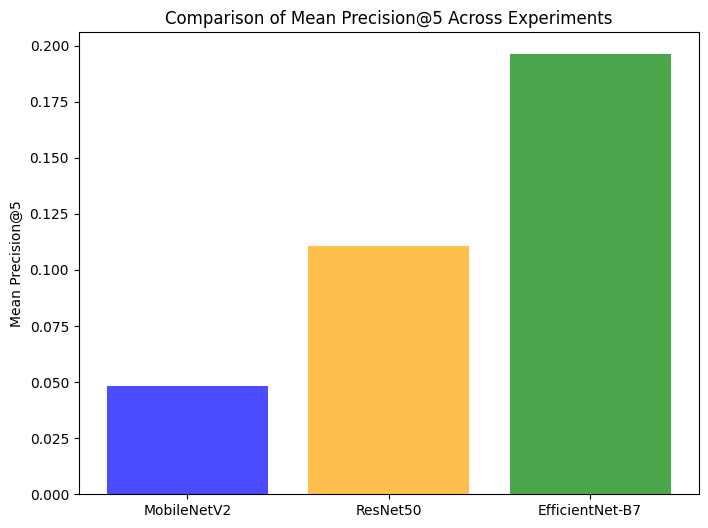

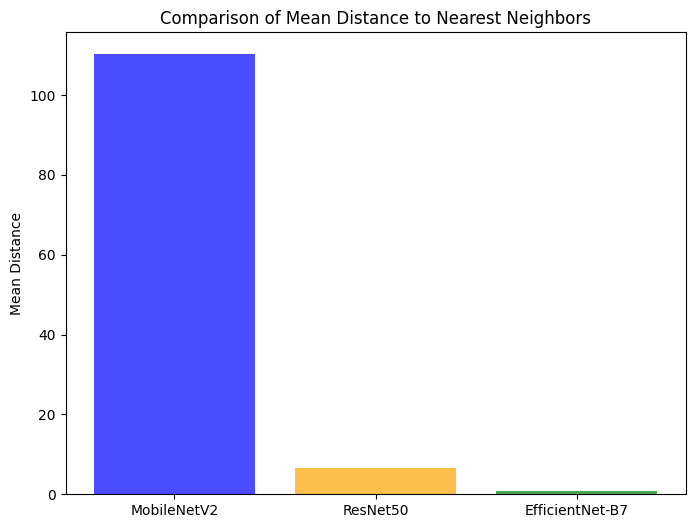

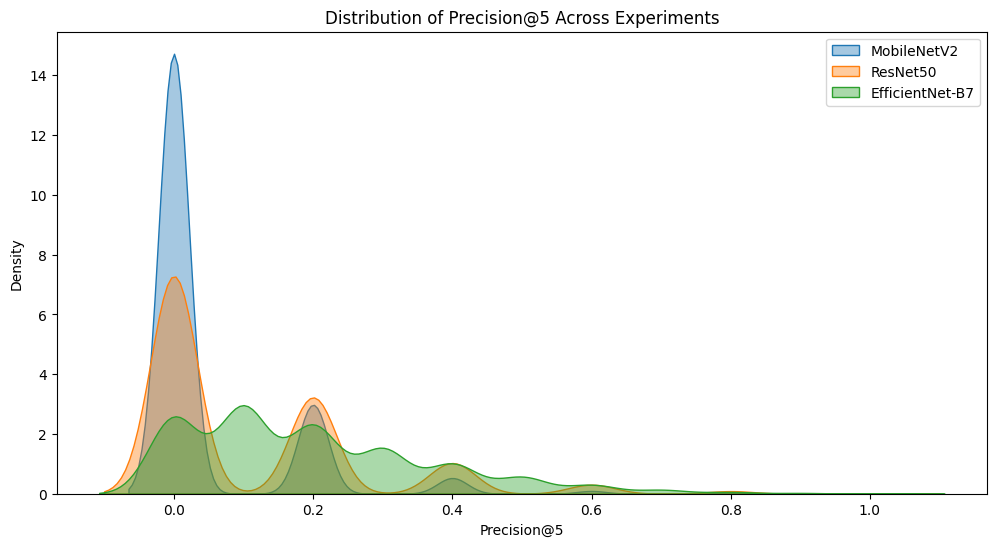

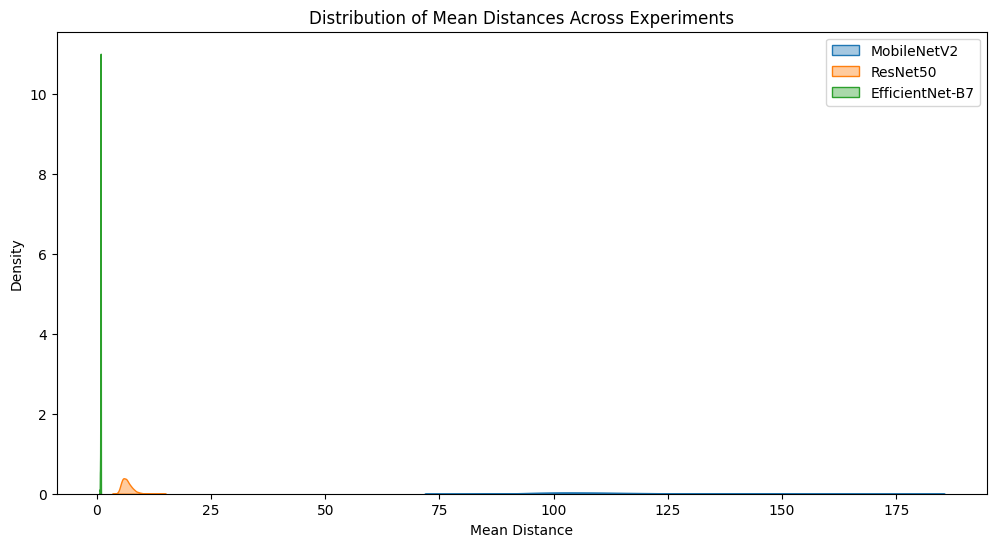

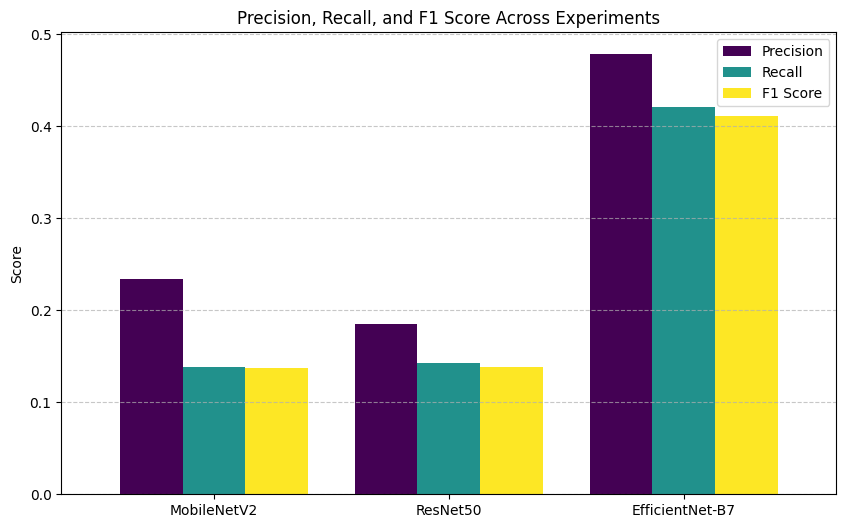

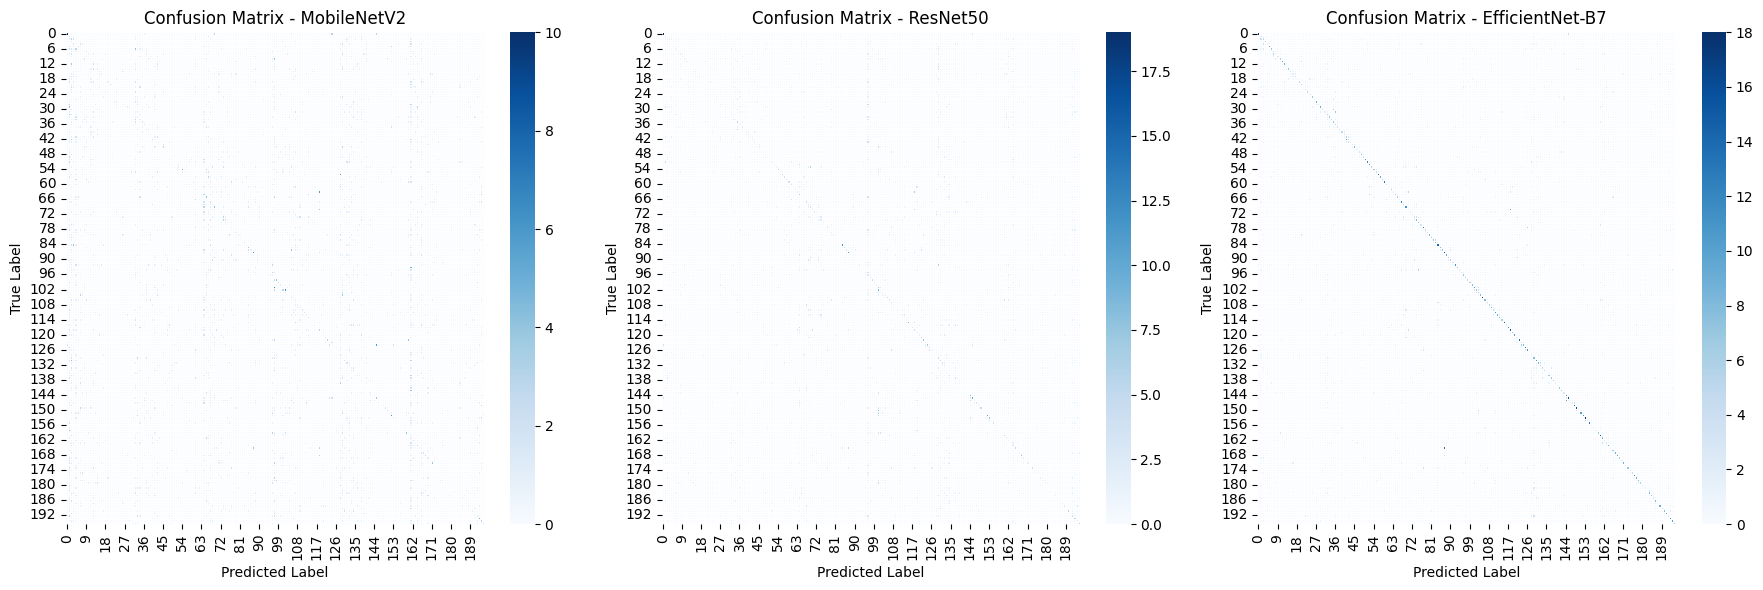

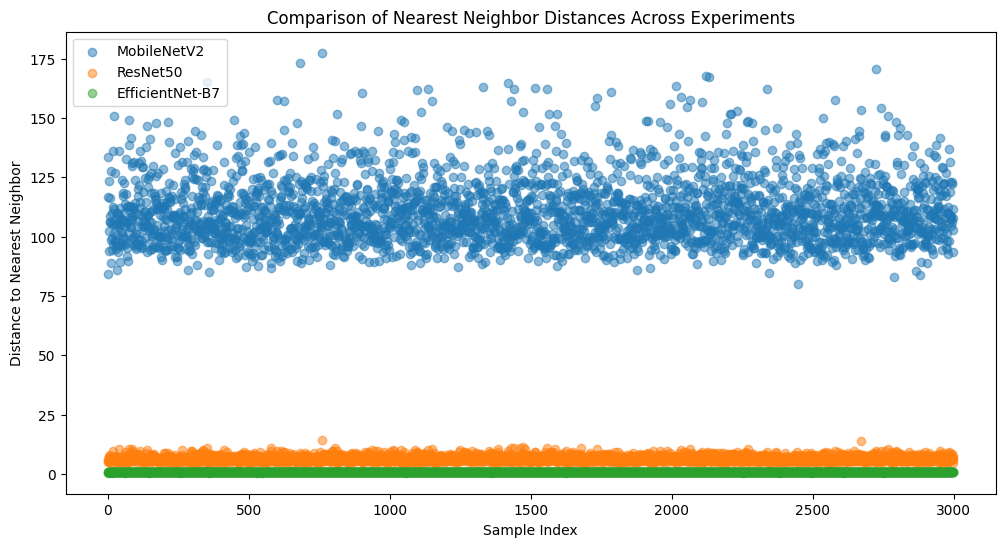

time: 6.57 s (started: 2025-03-20 13:36:28 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix


plt.figure(figsize=(8, 6))
plt.bar(["MobileNetV2", "ResNet50", "EfficientNet-B7"],
        [mean_precision_test, mean_precision_test_2, mean_precision_test_3],
        color=["blue", "orange", "green"], alpha=0.7)
plt.ylabel("Mean Precision@5")
plt.title("Comparison of Mean Precision@5 Across Experiments")
plt.show()


plt.figure(figsize=(8, 6))
plt.bar(["MobileNetV2", "ResNet50", "EfficientNet-B7"],
        [mean_distance_test, mean_distance_test_2, mean_distance_test_3],
        color=["blue", "orange", "green"], alpha=0.7)
plt.ylabel("Mean Distance")
plt.title("Comparison of Mean Distance to Nearest Neighbors")
plt.show()


plt.figure(figsize=(12, 6))
sns.kdeplot(precision_values_test, label="MobileNetV2", fill=True, alpha=0.4)
sns.kdeplot(precision_values_test_2, label="ResNet50", fill=True, alpha=0.4)
sns.kdeplot(precision_values_test_3, label="EfficientNet-B7", fill=True, alpha=0.4)
plt.title("Distribution of Precision@5 Across Experiments")
plt.xlabel("Precision@5")
plt.ylabel("Density")
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
sns.kdeplot(distance_values_test, label="MobileNetV2", fill=True, alpha=0.4)
sns.kdeplot(distance_values_test_2, label="ResNet50", fill=True, alpha=0.4)
sns.kdeplot(distance_values_test_3, label="EfficientNet-B7", fill=True, alpha=0.4)
plt.title("Distribution of Mean Distances Across Experiments")
plt.xlabel("Mean Distance")
plt.ylabel("Density")
plt.legend()
plt.show()


avg_metrics = {
    "Precision": [avg_precision, avg_precision_2, avg_precision_3],
    "Recall": [avg_recall, avg_recall_2, avg_recall_3],
    "F1 Score": [avg_f1, avg_f1_2, avg_f1_3]
}

df_metrics = pd.DataFrame(avg_metrics, index=["MobileNetV2", "ResNet50", "EfficientNet-B7"])

fig, ax = plt.subplots(figsize=(10, 6))
df_metrics.plot(kind="bar", ax=ax, width=0.8, colormap="viridis")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Precision, Recall, and F1 Score Across Experiments")
plt.ylabel("Score")
plt.legend(loc="upper right")
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, (conf_matrix, title) in enumerate(zip(
    [conf_matrix, conf_matrix_2, conf_matrix_3],
    ["MobileNetV2", "ResNet50", "EfficientNet-B7"]
)):
    sns.heatmap(conf_matrix, ax=axes[i], annot=False, fmt="d", cmap="Blues", linewidths=0.5)
    axes[i].set_title(f"Confusion Matrix - {title}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.scatter(range(len(distance_values_test)), distance_values_test, label="MobileNetV2", alpha=0.5)
plt.scatter(range(len(distance_values_test_2)), distance_values_test_2, label="ResNet50", alpha=0.5)
plt.scatter(range(len(distance_values_test_3)), distance_values_test_3, label="EfficientNet-B7", alpha=0.5)
plt.title("Comparison of Nearest Neighbor Distances Across Experiments")
plt.xlabel("Sample Index")
plt.ylabel("Distance to Nearest Neighbor")
plt.legend()
plt.show()

##**Load the winning model**

In [ ]:
import torch

loaded_model = torch.load("embedding_model_conf2.pth", weights_only=False)

loaded_model.eval()

print("Model loaded successfully!")


Model loaded successfully!
time: 548 ms (started: 2025-03-20 13:51:42 +00:00)


##**The test environment - The winning model**
This script serves as a test environment for the winning model, loading the pre-trained EfficientNet-B7 with saved weights. It restores the trained embeddings and applies PCA and KNN for classification.  The user uploads an image from their device, which is then preprocessed and passed through the model. The extracted embedding is compared to stored embeddings using cosine similarity in KNN, and the predicted class is displayed above the image. This approach ensures a flexible and interactive evaluation of the trained model.

Using device: cuda
Model loaded successfully!
Embeddings files found! Loading data...
KNN is ready for use!
 Please upload an image:


Saving example.png to example.png
 Selected image: example.png


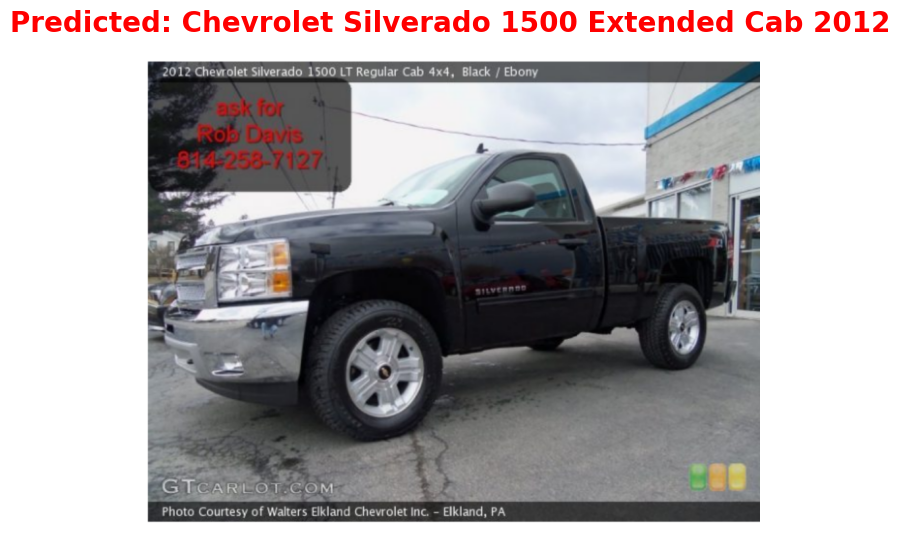

time: 18.5 s (started: 2025-03-17 12:10:21 +00:00)


In [ ]:
import torch
from torchvision import models, transforms
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import os


try:
    from google.colab import files
    colab_env = True
except ImportError:
    colab_env = False


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


MODEL_COMPLETE_PATH_3 = "embedding_model_weights.pth"


base_model_3 = models.efficientnet_b7(weights="EfficientNet_B7_Weights.DEFAULT")
embedding_model_3 = nn.Sequential(*list(base_model_3.children())[:-1]).to(device)

embedding_model_3.load_state_dict(torch.load(MODEL_COMPLETE_PATH_3, map_location=device))
embedding_model_3.eval()
print("Model loaded successfully!")


if os.path.exists("train_embeddings.npy") and os.path.exists("train_labels.npy"):
    print("Embeddings files found! Loading data...")
    train_embeddings_3 = np.load("train_embeddings.npy")
    train_labels_3 = np.load("train_labels.npy")
else:
    print("Embeddings files missing! Recomputing...")
    train_embeddings_3 = np.random.rand(100, 512)
    train_labels_3 = np.random.randint(0, 196, 100)


scaler_3 = StandardScaler()
train_embeddings_3 = scaler_3.fit_transform(train_embeddings_3)

pca_3 = PCA(n_components=min(512, train_embeddings_3.shape[1]), whiten=True)
train_embeddings_3 = pca_3.fit_transform(train_embeddings_3)


knn_3 = NearestNeighbors(n_neighbors=10, metric='cosine')
knn_3.fit(train_embeddings_3)
print("KNN is ready for use!")


if colab_env:
    print(" Please upload an image:")
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]
else:
    image_path = input("Enter the path to the image: ")

if not os.path.exists(image_path):
    print("No image found. Exiting...")
    exit()

print(f" Selected image: {image_path}")


transform = transforms.Compose([
    transforms.Resize((600, 600)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


input_tensor = transform(Image.open(image_path).convert('RGB')).unsqueeze(0).to(device)


embedding_model_3.eval()
with torch.no_grad():
    embedding = embedding_model_3(input_tensor).view(1, -1).cpu().numpy()

embedding = scaler_3.transform(embedding)
embedding = pca_3.transform(embedding)


_, indices = knn_3.kneighbors(embedding)
predicted_labels = [train_labels_3[idx] for idx in indices[0]]


predicted_class = max(set(predicted_labels), key=predicted_labels.count)
predicted_class_name = train_class_names[predicted_class]


fig, ax = plt.subplots(figsize=(8, 8))
image = Image.open(image_path).convert('RGB')
ax.imshow(image)
ax.axis("off")

ax.set_title(
    f"Predicted: {predicted_class_name}",
    fontsize=20, fontweight="bold", color="red", pad=20
)

plt.show()


##**Analysis results:**
**The winning model does indeed correctly predict the label of the displayed vehicle image. (Based on testing against the actual label from the database)**